In [1]:
using Plots , LinearAlgebra

In [2]:
N = 1000
h = 0.01
diag = h*h + 2
vector_up = [0; ones(N-2) * (-1)]
vector_diagonal = [1; ones(N-2) * diag; -2]
vector_down = [ones(N-2) * (-1); 1]
vector_b = [1; zeros(N-2); -1]
i_max = 1000000
epsilon= 1e-10
x_values = 1:N

1:1000

In [18]:
function richardson(diag, lower, upper, b, y0, max, eps, omega)
    n = length(b)
    y = copy(y0)
    y_previous = copy(y0)
    for k in 1:max
        y_previous .= y  
        for i in 1:n
            sigma = 0.0
            if i > 1
                sigma += lower[i-1] * y[i-1]
            end
            if i < n
                sigma += upper[i] * y_previous[i+1]
            end
            y[i] = (1.0 - omega) * y_previous[i] + (omega / diag[i]) * (b[i] - sigma)
        end
        if norm(y - y_previous, Inf) < eps
            return y 
        end
    end
    return y
end
vector_y0 = zeros(N)
omega = 1.0  
result1 = richardson(vector_diagonal, vector_down, vector_up, vector_b, vector_y0, i_max, epsilon, omega)
y_values1 = [result1[n] for n in x_values]
plot(x_values * h, y_values1, xlabel="nh", ylabel="y_n", legend=:bottomright, label="Richardson")


201459


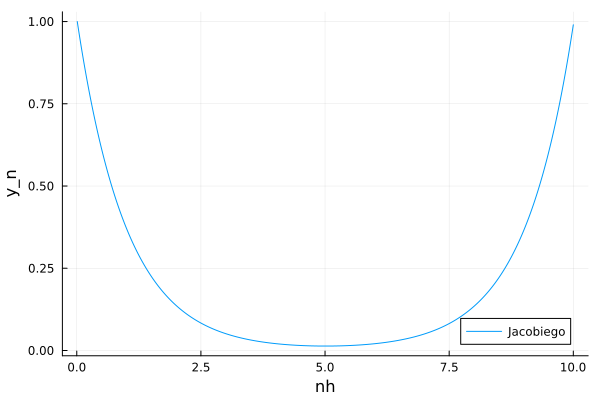

In [8]:
function jacobi(diagonal, lower, upper, b, y0, max, eps)
    n = length(b)
    y = copy(y0)
    y_prev = copy(y0)

    for k in 1:max
        y_prev .= y 
        
        for i in 1:n
            sigma = 0.0
            if i > 1
                sigma += lower[i-1] * y_prev[i-1]
            end
            if i < n
                sigma += upper[i] * y_prev[i+1]
            end
            y[i] = (b[i] - sigma) / diagonal[i]
        end
        if norm(y - y_prev, Inf) < eps
            return y
        end
    end
    return y
end
vector_y0 = zeros(N)
result2 = jacobi(vector_diagonal, vector_down, vector_up, vector_b, vector_y0, i_max, epsilon)
y_values2 = [result2[n] for n in x_values]
plot(x_values * h, y_values2, xlabel="nh", ylabel="y_n", legend=:bottomright, label="Jacobiego")


106868


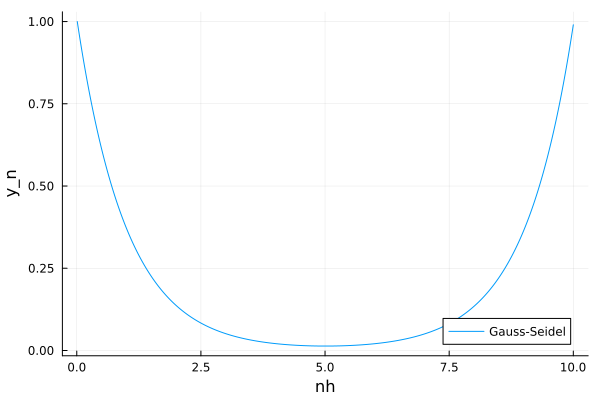

In [7]:
function gauss_seidel(diag, lower, upper, b, y0, max, eps)
    n = length(b)
    y = copy(y0)
    y_prev = copy(y0)
    
    for k in 1:max
        y_prev .= y  
        for i in 1:n
            sigma = 0.0
            if i > 1
                sigma += lower[i-1] * y[i-1]
            end
            if i < n
                sigma += upper[i] * y_prev[i+1]
            end
            y[i] = (b[i] - sigma) / diag[i]
        end
        if norm(y - y_prev, Inf) < eps
            return y
        end
    end
    return y
end

result3 = gauss_seidel(vector_diagonal, vector_down, vector_up, vector_b, vector_y0, i_max, epsilon)
y_values3 = [result3[n] for n in x_values]
plot(x_values * h, y_values3, xlabel="nh", ylabel="y_n", legend=:bottomright, label="Gauss-Seidel")


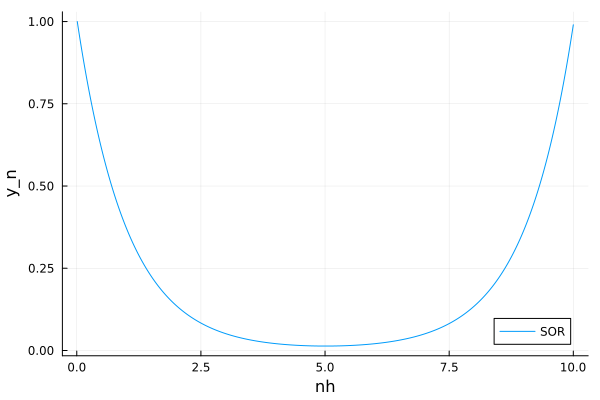

In [6]:
function sor(diag, lower, upper, b, y0, max, eps, omega)
    n = length(b)
    y = copy(y0)
    y_prev = copy(y0)
    
    for k in 1:max
        y_prev .= y  
        for i in 1:n
            sigma = 0.0
            if i > 1
                sigma += lower[i-1] * y[i-1]
            end
            if i < n
                sigma += upper[i] * y_prev[i+1]
            end
            y[i] = (1.0 - omega) * y_prev[i] + (omega / diag[i]) * (b[i] - sigma)
        end
        if norm(y - y_prev, Inf) < eps
            return y
        end
    end
    return y
end

omega = 1.4 
result4 = sor(vector_diagonal, vector_down, vector_up, vector_b, vector_y0, i_max, epsilon, omega)
y_values4 = [result4[n] for n in x_values]


plot(x_values * h, y_values4, xlabel="nh", ylabel="y_n", legend=:bottomright, label="SOR")
